In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("lstm_foot_contact_model.h5")

print("Model loaded successfully!")


/Users/jingyiliu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Model loaded successfully!


In [4]:
# Load new data (same format as training data)
new_data = pd.read_csv("cleaned_data_stepfloor.csv")  # Replace with your file

# Select the same feature columns as in training
feature_columns = [col for col in new_data.columns if col not in ["left", "right"]]  # Remove target columns
X_new = new_data[feature_columns].values  # Convert to numpy array

# Apply the same MinMaxScaler that was used during training
scaler = MinMaxScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Ensure to use the same scaler

# Check shape
print(f"New data shape: {X_new_scaled.shape}")


New data shape: (20578, 26)


In [5]:
sequence_length = 273  # Use the same sequence length as in training

X_new_lstm = []
for i in range(len(X_new_scaled) - sequence_length):
    X_new_lstm.append(X_new_scaled[i:i + sequence_length])

X_new_lstm = np.array(X_new_lstm)  # Convert list to numpy array

print(f"Reshaped new data for LSTM: {X_new_lstm.shape}")  # Should be (samples, timesteps, features)


Reshaped new data for LSTM: (20305, 273, 26)


In [6]:
# Predict foot contact states
y_pred = model.predict(X_new_lstm)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Predictions completed!")


635/635 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step
Predictions completed!


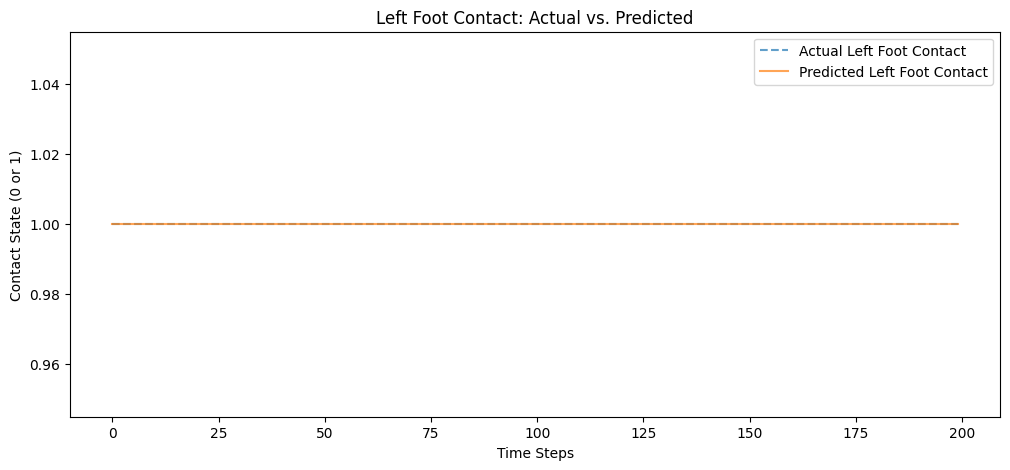

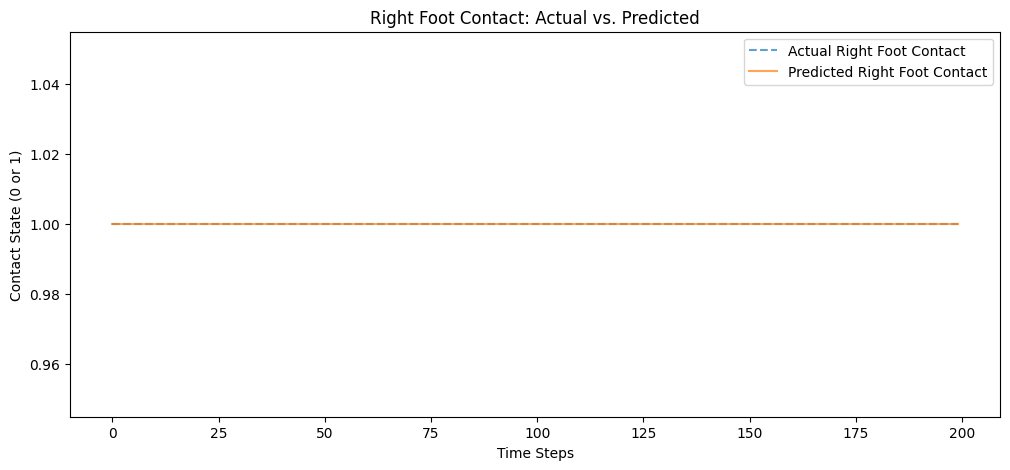

In [7]:
import matplotlib.pyplot as plt

# Load actual labels for comparison (shifted to match sequence length)
y_actual = new_data[["left", "right"]].values[sequence_length:]  # Adjust for sequence offset

# Plot Left Foot Contact
plt.figure(figsize=(12, 5))
plt.plot(y_actual[:200, 0], label="Actual Left Foot Contact", linestyle="dashed", alpha=0.7)
plt.plot(y_pred_binary[:200, 0], label="Predicted Left Foot Contact", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Contact State (0 or 1)")
plt.title("Left Foot Contact: Actual vs. Predicted")
plt.legend()
plt.show()

# Plot Right Foot Contact
plt.figure(figsize=(12, 5))
plt.plot(y_actual[:200, 1], label="Actual Right Foot Contact", linestyle="dashed", alpha=0.7)
plt.plot(y_pred_binary[:200, 1], label="Predicted Right Foot Contact", alpha=0.7)
plt.xlabel("Time Steps")
plt.ylabel("Contact State (0 or 1)")
plt.title("Right Foot Contact: Actual vs. Predicted")
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Left Foot Contact Classification Report:")
print(classification_report(y_actual[:, 0], y_pred_binary[:, 0]))

print("Right Foot Contact Classification Report:")
print(classification_report(y_actual[:, 1], y_pred_binary[:, 1]))


Left Foot Contact Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      7341
           1       0.96      0.78      0.86     12964

    accuracy                           0.84     20305
   macro avg       0.83      0.86      0.83     20305
weighted avg       0.87      0.84      0.84     20305

Right Foot Contact Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      9044
           1       0.79      0.95      0.86     11261

    accuracy                           0.83     20305
   macro avg       0.85      0.81      0.82     20305
weighted avg       0.84      0.83      0.82     20305

